# Spam Detection 

#### Steps Followed

1. Reading dataset and making it in proper format

2. Encode labels as required

3. Convert all cases to lower for model understanding

4. Remove punctuations

5. Remove stopwords

6. Check stat of messages

7. Convert all text to vector       #the 1-7 steps are data preprocessing

8. Import Classifier

9. Train and Test

10. Check the accuracy of model (confusion matrix)



# Importing libraries

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [177]:
#load the dataset

sms=pd.read_csv('spam.csv',encoding='latin-1')

In [178]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [179]:
#Dataset has extra columns which need to be removed
#Renaming v1 and v2

sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=0,inplace=True)
sms.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [180]:
#we got the required data removing unwanted column
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [181]:
print('Shape => ',sms.shape)

Shape =>  (5572, 2)


There are 5572 rows of data available

In [182]:
print('ham and spam counts \n',sms.label.value_counts())

ham and spam counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [183]:
#Ratio of spam and ham mails

print ('Spam ratio = ',round(len(sms[sms['label']=='spam'])/len(sms.label),2)*100,'%')

Spam ratio =  13.0 %


In [184]:
print('Ham ratio = ',round(len(sms[sms['label']=='ham'])/len(sms.label),2)*100,'%')

Ham ratio =  87.0 %


In [185]:
#New column for length of message

sms['length']=sms.message.str.len()
sms.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [186]:
#Label coding 0 and 1

sms['label'].replace({'ham':0,'spam':1},inplace=True)

In [187]:
#convert all messages to lower case

sms['message']=sms['message'].str.lower()

In [188]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


### Regular Expression

we have to remove regular expression and punctuations

In [189]:
#Replace email address with email

sms['message']=sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email address')

In [190]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [191]:
#replace URLS with webaddress

sms['message']=sms['message'].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [192]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [193]:
#replace money symbol with 'moneysymp' (£ Can be typed using windows+. key) 

sms['message']=sms['message'].str.replace(r'£|\$','dollars')



In [194]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [195]:
#Replace 10 digit phone numbers (formats include paranthesis,spaces,no spaces,dashes) with phone number

sms['message']=sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone number')

In [196]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [197]:
#Replace numbers with number

sms['message']=sms['message'].str.replace(r'\d+(\.\d+)?','number')

In [198]:
sms.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in number a wkly comp to win fa cup...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [199]:
#Remove punctuation

sms['message']=sms['message'].str.replace(r'[^\w\d\s]',' ')

In [200]:
sms

,label,message,length
0,0,go until jurong point crazy available only ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in number a wkly comp to win fa cup...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives aro...,61
...,...,...,...
5567,1,this is the numbernd time we have tried number...,161
5568,0,will ã¼ b going to esplanade fr home,37
5569,0,pity was in mood for that so any other s...,57
5570,0,the guy did some bitching but i acted like i d...,125


In [201]:
#Replace whitespace between terms with a single space

sms['message']=sms['message'].str.replace(r'\s+',' ')

In [202]:
#Remove leading and twisting white space

sms['message']=sms['message'].str.replace(r'^\s+|\s+?$',' ')

In [203]:
sms.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in number a wkly comp to win fa cup...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [204]:
#Remove stopwords

import string
import nltk
from nltk.corpus import stopwords
stp=set(stopwords.words('english')+['u','ã','ur','4','2','im','dont','doin','ure'])
sms['message']=sms['message'].apply(lambda x:' '.join(term for term in x.split() if term not in stp))

In [205]:
#New column (clean_length) after punctuations stopwords removal

sms['clean_length']=sms.message.str.len()

In [206]:
sms.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry number wkly comp win fa cup final t...,155,145
3,0,dun say early hor c already say,49,31
4,0,nah think goes usf lives around though,61,38


Pre-processing that is data cleaning is done 

In [207]:
#Total length removal done

print('original length',sms.length.sum())
print('clean length',sms.clean_length.sum())

original length 449194
clean length 307099


###### Message Distribution Before cleaning

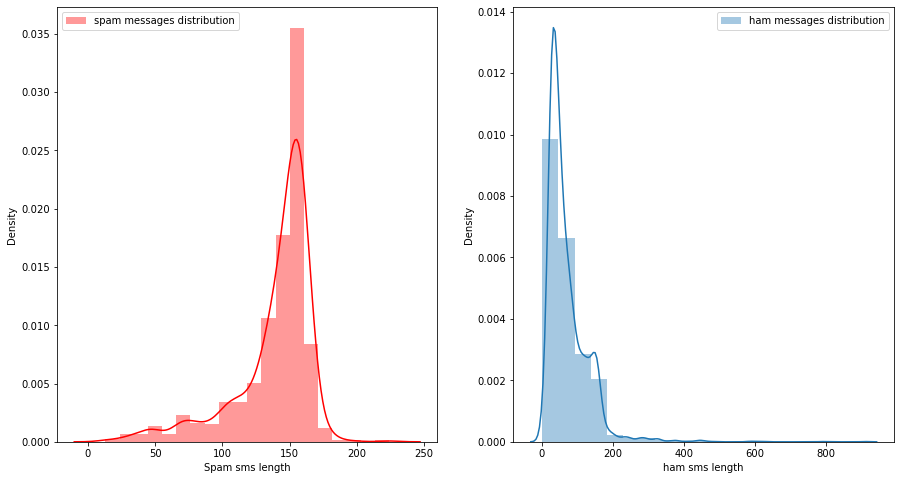

In [208]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#spam
sns.distplot(sms[sms['label']==1]['length'],bins=20,ax=ax[0],label='spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

#ham
sns.distplot(sms[sms['label']==0]['length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

###### Message Distribution After cleaning

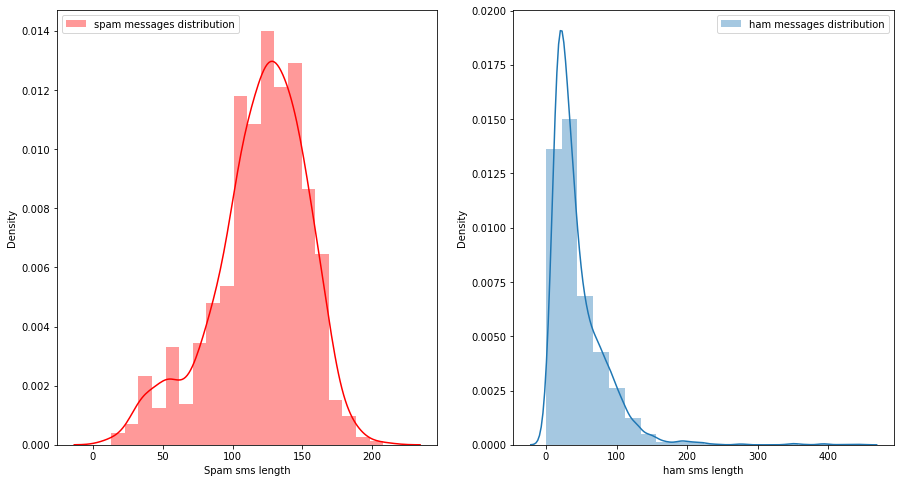

In [211]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#spam
sns.distplot(sms[sms['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam messages distribution',color='r')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

#ham
sns.distplot(sms[sms['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham messages distribution')
ax[1].set_xlabel('ham sms length')
ax[1].legend()

plt.show()

## Getting sense of loud words in spam 

In [213]:
#!pip install wordcloud

In [214]:
from wordcloud import WordCloud #importing library

In [215]:
spams=sms['message'][sms['label']==1]

spam_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(spams))

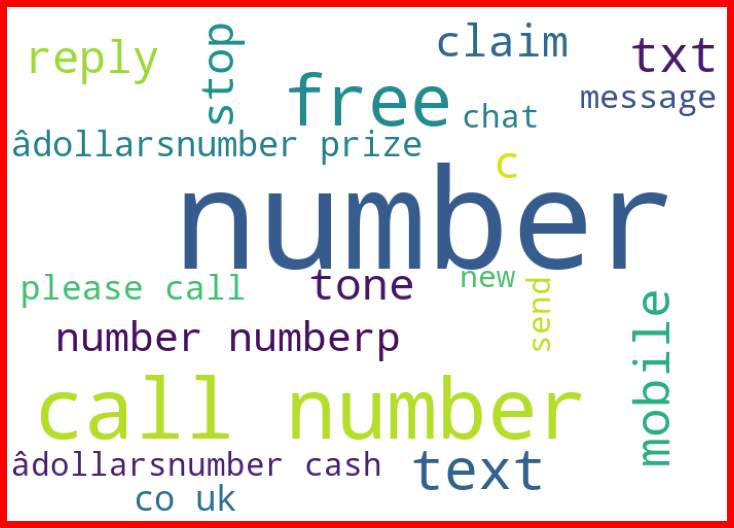

In [216]:
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

we can see some of the words "free,claim,cash"etcare indication of spam

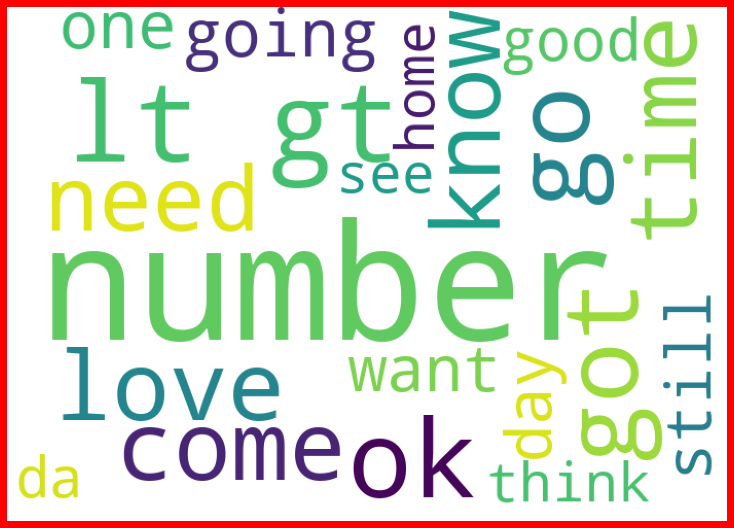

In [217]:
#similarily for ham

hams=sms['message'][sms['label']==0]

ham_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(ham_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Most occuring words for ham

we have classified ham and spam

Now we have to convert text into vectors using TFIDF

Initiate Multinomial NB Classifier

Split feature and label 

build and test model

In [219]:
#MODEL BUILDING #required libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [220]:
#Changing text into vectors

tf_vec=TfidfVectorizer()
naive=MultinomialNB()
features=tf_vec.fit_transform(sms['message'])

In [221]:
#initializing X and y

X=features
y=sms['label']

In [223]:
#Train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)

In [224]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.9770279971284996


## Therefore the model work with 97.77% accuracy classifying whether it is spam or not

In [226]:
# Let us see other  metrics

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1207
           1       1.00      0.83      0.91       186

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [227]:
print(confusion_matrix(y_test,y_pred))

[[1207    0]
 [  32  154]]


The positive result works excellent but some of the negative values are wrongly classified

#### The model is 97.77% efficient to classify whether the mails are ham or spam

# The model created successfully